 # Compile the C++ Engine
## This command compiles the C++ source files into a single executable called pricing_engine. This engine contains all the core logic (Black-Scholes, Greeks, and optional Binomial model) and will be used by Python to perform high-speed financial calculations

In [10]:
!g++ main.cpp black_scholes.cpp greeks.cpp binomial_tree.cpp -o pricing_engine


#Make the Engine Executable
## This command gives execution permission to the compiled pricing_engine binary so that Python can run it. Without this, the system would block the engine from executing due to security settings.





In [11]:
!chmod +x pricing_engine


# Run the Engine with Sample Inputs (Manual Test)
##This Python function uses subprocess to call the compiled C++ engine and passes it sample inputs for stock price, strike, interest rate, time to expiry, volatility, and option type. Its a simple test to confirm that the engine runs and returns correct output before building the interactive UI.

In [12]:
import subprocess

def run_pricing_engine(S, K, r, T, sigma, option_type="call"):
    cmd = ['./pricing_engine', str(S), str(K), str(r), str(T), str(sigma), option_type]
    result = subprocess.run(cmd, capture_output=True, text=True)
    print(result.stdout)

run_pricing_engine(192.3, 200, 0.05, 0.3, 0.25, "call")


Option Price: 8.43041



#Install Required Libraries
## This installs yfinance to fetch real-time option market data, and ipywidgets to build an interactive user interface within the notebook. These tools enable live financial inputs and app-like interaction with the C++ pricing engine.

In [13]:
!pip install yfinance
!pip install ipywidgets


#Import Widget Libraries
## This block imports the necessary libraries to build interactive elements in the notebook. ipywidgets allows for creating input boxes, dropdowns, and buttons, while display() is used to render those elements in the notebook interfac

In [14]:
import ipywidgets as widgets
from IPython.display import display


#Build Interactive Input Panel
##This block creates an interactive form using ipywidgets for entering option parameters. Users can input values for stock price, strike, interest rate, time to expiry, and volatility, and choose between a call or put option. This enables real-time, user-driven pricing without touching the cod

In [15]:
S_input = widgets.FloatText(value=200.0, description='Stock Price:')
K_input = widgets.FloatText(value=200.0, description='Strike Price:')
r_input = widgets.FloatText(value=0.05, description='Interest Rate:')
T_input = widgets.FloatText(value=0.3, description='Time to Expiry:')
sigma_input = widgets.FloatText(value=0.25, description='Volatility:')
type_input = widgets.Dropdown(options=['call', 'put'], value='call', description='Option Type:')

input_box = widgets.VBox([S_input, K_input, r_input, T_input, sigma_input, type_input])
display(input_box)


# Add Option Payoff Chart

Plots how much profit/loss you make at expiry across a range of stock prices

Helps you visualize the value of the option

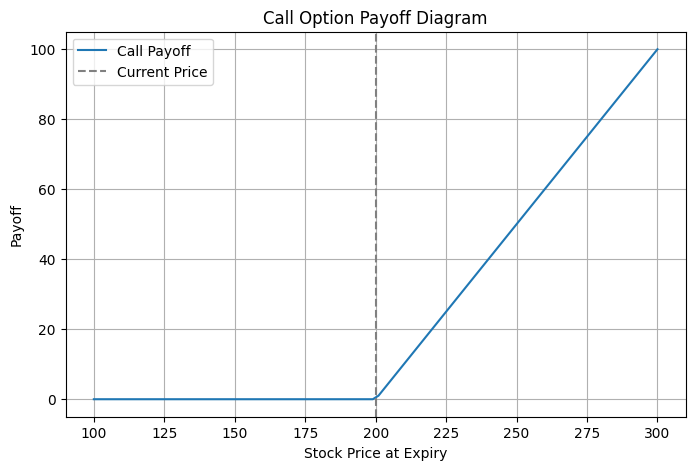

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def plot_payoff(S, K, option_type):
    stock_prices = np.linspace(0.5 * K, 1.5 * K, 100)

    if option_type == 'call':
        payoff = np.maximum(stock_prices - K, 0)
    else:
        payoff = np.maximum(K - stock_prices, 0)

    plt.figure(figsize=(8, 5))
    plt.plot(stock_prices, payoff, label=f'{option_type.capitalize()} Payoff')
    plt.axvline(x=S, color='gray', linestyle='--', label='Current Price')
    plt.xlabel('Stock Price at Expiry')
    plt.ylabel('Payoff')
    plt.title(f'{option_type.capitalize()} Option Payoff Diagram')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage (you can replace this with input values):
plot_payoff(S_input.value, K_input.value, type_input.value)


#Add Interactive Button and Output Display
## This block creates a “Calculate Option Price” button that, when clicked, gathers input values from the widgets, runs the C++ pricing engine using those values, and displays the result. It also plots the option payoff diagram to visually show potential profit/loss at expiry. This transforms the notebook into an interactive, app-like experience

In [17]:
run_button = widgets.Button(description="Calculate Option Price")

output = widgets.Output()

def on_button_clicked(b):
    S = S_input.value
    K = K_input.value
    r = r_input.value
    T = T_input.value
    sigma = sigma_input.value
    opt_type = type_input.value

    result = subprocess.run(
        ['./pricing_engine', str(S), str(K), str(r), str(T), str(sigma), opt_type],
        capture_output=True, text=True
    )

    with output:
        output.clear_output()
        print("Option Price:", result.stdout.strip())
        plot_payoff(S, K, opt_type)


run_button.on_click(on_button_clicked)

display(run_button, output)


Button(description='Calculate Option Price', style=ButtonStyle())

Output()